# PMM Control Simulator Module 

Simulate the PMM board controller using equivalent operations performed on model resonators

In [1]:
from pmmcontrol.simulator import control, detector, hysteresis

**control** is a duplicate of the regular pmmcontrol module with functions modified to work with the resonator models.

**detector** contains the detector and resonator classes. A detector contains an array of resonators.

**hysteresis** contains the hysteresis model used by each resonator.

In [2]:
control = control.Control()

By default sets up a 9 by 10 configuration:

In [3]:
[control.rows, control.columns]

[9, 10]

```control.selectMagnet()``` is run with several parameters:

```def selectMagnet(self, row, column, isPrimary=True, isArrayMode=False, sign='positive')```

- ```row``` and ```column``` select the coordinates of the magnet begining with ```0, 0```

- ```isPrimary``` tells the function whether we are using the large or small resistors

- ```isArrayMode``` controls whether the function sets the current on all other magnets as well

- ```sign``` is set according to whether we want to send a ```'positive'``` or ```'negative'``` current

In [4]:
control.selectMagnet(1, 1, True, True)

True

After running this command, the simulator generates 9 by 10 array of resonators - each with its own hysteresis model

The history of the currently selected magnet can be shown using ```control.showHistory()```

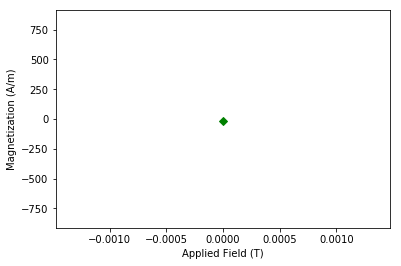

In [5]:
%matplotlib inline
control.showHistory()

Currently there is no history because we have not set any current

To set current we use ```control.setCurrent(current)``` which takes current input in mA

First we will try to set the current too high...

In [6]:
control.setCurrent(50)

ValueError: The maximum current allowed on any magnet is 45.19 mA

We are informed that the maximum current allowed on this magnet is $45.19$ mA

Now lets try setting it to something more reasonable

In [7]:
control.setCurrent(15)

True

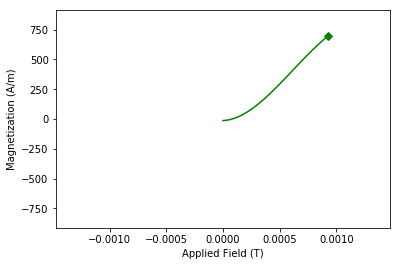

In [8]:
control.showHistory()

As seen in the history, the magnet saturated at around 1 mT

Hysteretic behavior can be seen when we decrease back down to zero current

In [9]:
control.setCurrent(0)

True

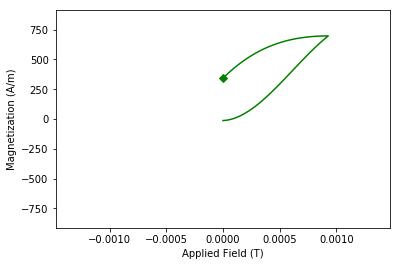

In [10]:
control.showHistory()

Instead of following the same path on the return to 0 current, it returns to a nonzero magnetization

We can also see what happened to others magnets after messing with the target magnet at ```(0, 0)```

In [11]:
control.selectMagnet(0,1)

True

This magnet is on the same row as the target magnet so it recieved compensating current in only one direction

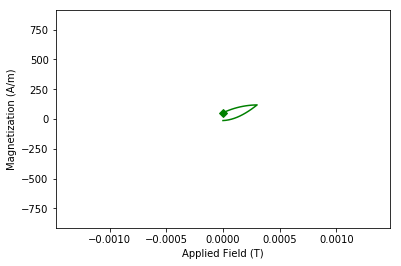

In [12]:
control.showHistory()

Because we configured the controller in ```isArrayMode = True```, compensating current was send down other rows to minimize the effect on other magnets that controlling our target magnet had

We should also check a magnet that recieved the compensating current in both directions

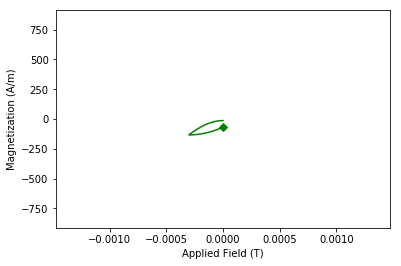

In [13]:
control.selectMagnet(0,0)
control.showHistory()

It is clear that all magnets besides the selected magnet were minimally affected

Let's look again at our magetized magnet

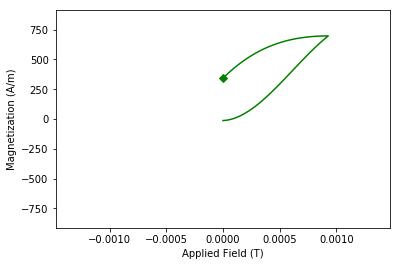

In [14]:
control.selectMagnet(1,1)
control.showHistory()

Even though we set the current back to zero, we have not eliminated the magnetization

To do so, we call ```resetMagnet()```. This function decreases the current with an oscillating exponential

Resetting...
Reset complete.


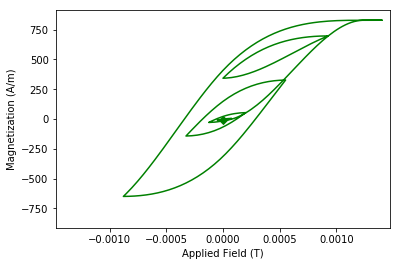

In [15]:
control.resetMagnet()
control.showHistory()

The magnet has now been reset to zero magnetization. Because this was run with ```isArrayModel = False``` by default, other magnets on the same row and column were affected.

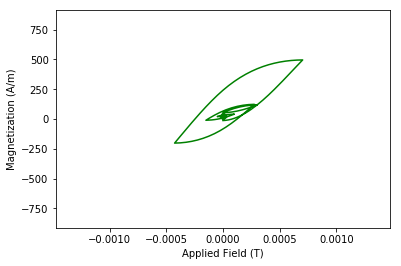

In [16]:
control.selectMagnet(1,4)
control.showHistory()

This means that after resetting a magnet, all magnets on the same row and column will be reset as well and must be reconfigured